#Team 5
Name: Yuting Gong, Linghan Leng

Business problem: how artists can increase their popularity on Spotify

# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import plotly
#import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.manifold import TSNE
import numpy as np

In [2]:
# import dataset
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
# take a look at the dataframe
df.info()
# the shape of the dataset is (174388,19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

# General insights about popularity

In [3]:
# add a 'decade' variable to the dataset
def get_decade(year):
  first_year = int(year/10)*10
  decade = str(first_year) + 's'
  return decade
df['decade'] = df['year'].apply(get_decade)
df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,1920s
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,1920s
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,1920s
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,1920s
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1920s


In [5]:
# we can know how many songs released in each decade.
fig = px.histogram(df.sort_values("decade"),x="decade",color="decade", width=800, height=400)
fig.show()

# 1940s to 1990s and 2010s have the most songs released

NameError: name 'px' is not defined

In [11]:
# get popularity for each decade
popular_year_df = pd.DataFrame(df.groupby(by=['decade']).mean()['popularity']).reset_index()
popular_year_df

,decade,popularity
0,1920s,1.193926
1,1930s,2.213304
2,1940s,1.810882
3,1950s,10.723700
4,1960s,26.388679
5,1970s,34.542499
6,1980s,36.956810
7,1990s,43.120769
8,2000s,43.167320
9,2010s,29.579203


<AxesSubplot:xlabel='popularity', ylabel='decade'>

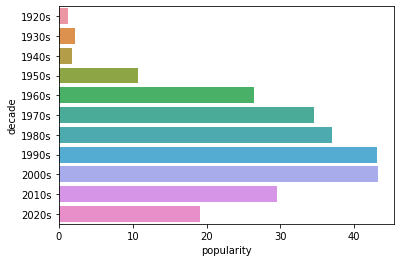

In [12]:
# popularity in different decades
sns.barplot(x='popularity', y='decade', data=popular_year_df)

# Songs released from 1950s to 2020s are more popular, especially in 1990s and 2000s.

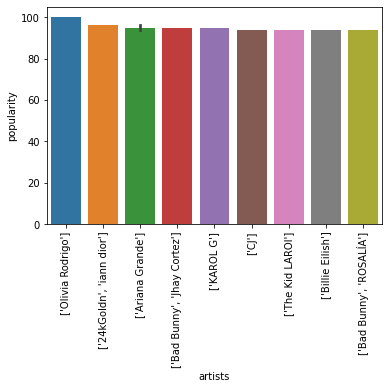

In [13]:
# artists' popularity ranking top 10
pop_sort = df.sort_values(by = 'popularity',ascending= False).head(10)
sns.barplot(data = pop_sort, x = 'artists', y = 'popularity')
plt.xticks(rotation = 90)
plt.show()

# Dataset manipulation

In [4]:
# drop columns with no predictive value
df.drop(columns = ['id','key','mode','name','release_date','year','decade'],inplace = True)

In [5]:
# set 'artists' as index
df.set_index('artists',inplace = True)
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
artists,,,,,,,,,,,,
['Mamie Smith'],0.991000,0.598,168333,0.224,0,0.000522,0.3790,-12.628,12,0.0936,149.976,0.6340
"[""Screamin' Jay Hawkins""]",0.643000,0.852,150200,0.517,0,0.026400,0.0809,-7.261,7,0.0534,86.889,0.9500
['Mamie Smith'],0.993000,0.647,163827,0.186,0,0.000018,0.5190,-12.098,4,0.1740,97.600,0.6890
['Oscar Velazquez'],0.000173,0.730,422087,0.798,0,0.801000,0.1280,-7.311,17,0.0425,127.997,0.0422
['Mixe'],0.295000,0.704,165224,0.707,1,0.000246,0.4020,-6.036,2,0.0768,122.076,0.2990


In [6]:
# standardize the dataset
ss = StandardScaler().fit_transform(df)
df_s = pd.DataFrame(ss,columns = df.columns)
df_s.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
0,1.294358,0.347919,-0.434495,-0.948791,-0.270401,-0.588004,0.930106,-0.154111,-0.626050,-0.066549,1.089753,0.413903
1,0.378411,1.790898,-0.556689,0.125710,-0.270401,-0.510657,-0.721489,0.788862,-0.854645,-0.287113,-0.995485,1.608718
2,1.299622,0.626289,-0.464860,-1.088146,-0.270401,-0.589511,1.705763,-0.060991,-0.991803,0.374580,-0.641450,0.621861
3,-1.313529,1.097814,1.275491,1.156204,-0.270401,1.804534,-0.460536,0.780077,-0.397454,-0.346918,0.363273,-1.823729
4,-0.537536,0.950107,-0.455446,0.822485,3.698207,-0.588829,1.057535,1.004092,-1.083241,-0.158725,0.167564,-0.852753


In [7]:
df_s.shape

(174389, 12)

# Correlation between popularity vs features

In [18]:
# In order to explore the correlation between popularity and the other features, we plot the correlation out
df_popu_corr = pd.DataFrame(df.corr()['popularity'][:]).reset_index().sort_values(by="popularity")
fig = px.bar(df_popu_corr, x="index", y="popularity", color="popularity", width=800, height=400)
fig.show()
# From this chart, we can see loudness, energy, instrumentalness and acousticines are important features.

NameError: name 'px' is not defined

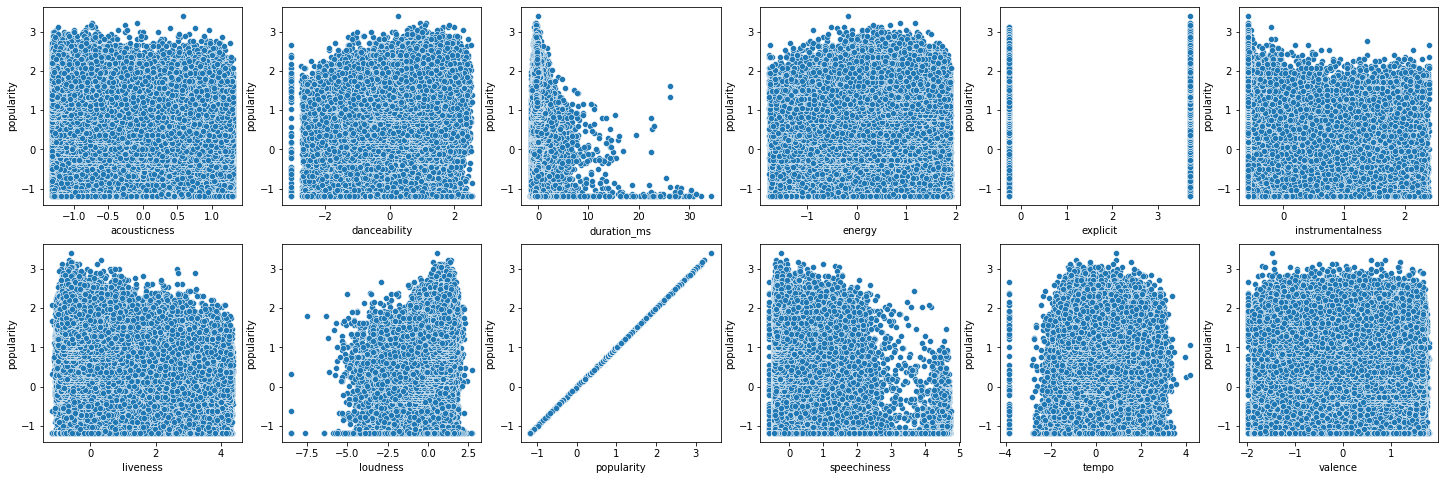

In [19]:
# graph features vs. popularity
index = 0
fig, axes = plt.subplots(2,6, figsize=(25,8))
for i in range(0,2):
  for j in range(0,6):
    sns.scatterplot(ax=axes[i,j],data = df_s,x = df_s.columns.to_list()[index],y = 'popularity')
    index = index + 1

# PCA

<AxesSubplot:>

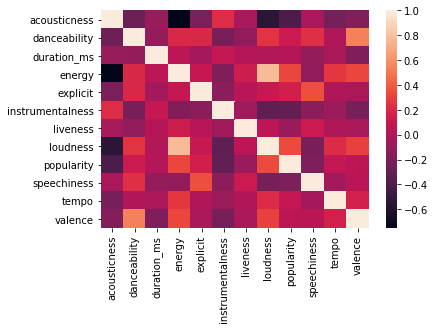

In [8]:
# correlation heatmap on artist features
corr = df_s.corr()
sns.heatmap(corr)

In [9]:
pca = PCA()
pcs = pca.fit_transform(df_s)
pcs.shape

(174389, 12)

/share/pkg.7/python3/3.7.9/install/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

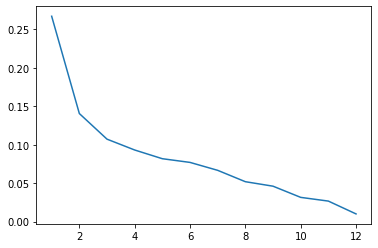

In [22]:
# first, lets get the explained variance for each PCA
# elbow plot
varexp = pca.explained_variance_ratio_

sns.lineplot(range(1, len(varexp)+1), varexp)

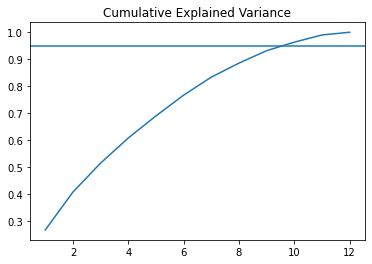

In [23]:
# get the cumulative variance for PCAs
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.95)
# Although our elbow method indicates that the elbow point is at PCA =2. 
# Only 2 principle components will not capture the full information of our dataset.
# we use threshold = 95% explained variance, thus, we chose 9 princile components

In [11]:
# component, feature
comps = pca.components_

# build column labels
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=COLS, index=df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
acousticness,0.442256,-0.106367,-0.215723,0.029726,-0.161976,0.039098,0.163754,0.258074,0.388394,0.026331,-0.557929,0.402077
danceability,-0.270292,-0.441094,-0.251657,-0.077295,0.327426,0.214957,0.064352,0.199835,-0.121889,-0.654761,-0.015022,0.147611
duration_ms,0.011218,0.312440,0.335440,-0.049281,0.549981,0.298632,0.604653,0.083343,0.112881,0.097937,-0.026925,-0.006116
energy,-0.477054,0.197241,0.072786,0.194819,0.097420,0.052805,-0.226370,-0.189434,-0.020682,0.172591,-0.082063,0.744249
explicit,-0.144175,-0.350082,0.503641,-0.243042,0.095660,-0.212237,-0.246819,0.314595,0.537381,0.084660,0.180279,0.037447
instrumentalness,0.258756,0.203105,-0.017401,0.201758,0.548585,-0.103931,-0.557770,0.341363,-0.208685,0.044157,-0.223143,-0.126921
liveness,-0.031008,-0.007630,0.387160,0.639270,-0.377172,0.321426,0.020507,0.388482,-0.103284,-0.162252,0.063680,-0.049595
loudness,-0.458566,0.181951,-0.033447,0.073738,-0.045292,0.114128,-0.130565,-0.178126,0.395433,-0.146439,-0.544377,-0.460483
popularity,-0.297923,0.166217,0.071943,-0.512967,-0.268217,-0.026300,0.068380,0.504550,-0.426300,0.147956,-0.282489,0.001117
speechiness,0.016629,-0.579735,0.356033,0.124378,0.111630,-0.113367,0.118762,-0.308993,-0.362770,0.231238,-0.444105,-0.064844


In [10]:
# reduce the data
reduced_data = PCA(n_components=9).fit_transform(df_s)
reduced_data.shape


(174389, 9)

# KMeans

/share/pkg.7/python3/3.7.9/install/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

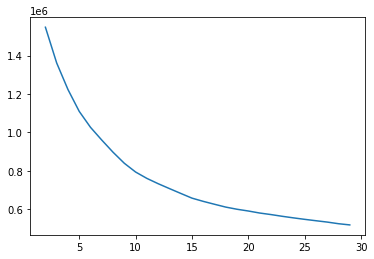

In [11]:
# Find the best K value: draw elbow method on inertia
KRANGE = range(2,30)
aa = []

for k in KRANGE:
  km = KMeans(k)
  lab = km.fit_predict(reduced_data)
  aa.append(km.inertia_)
sns.lineplot(KRANGE, aa)

/share/pkg.7/python3/3.7.9/install/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

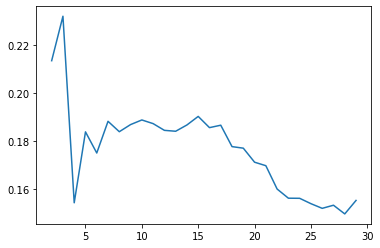

In [28]:
#silhouette score
KRANGE = range(2, 30)

ss = []


for k in KRANGE:
  km = KMeans(k)
  lab = km.fit_predict(reduced_data)
  ss.append(metrics.silhouette_score(reduced_data, lab))
sns.lineplot(KRANGE, ss)

In [17]:
# instantiate
k10 = KMeans(10)

In [18]:
# fit to the the data
k10.fit(df_s)

KMeans(n_clusters=10)

In [19]:
# get the cluster assignments in sklearn via the predict method
k10_labs = k10.predict(df_s)
df['k10'] = k10_labs
df_s['k10'] = k10_labs

In [20]:
# review what we had
df.head(3)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,k15,k10
artists,,,,,,,,,,,,,,
['Mamie Smith'],0.991,0.598,168333,0.224,0,0.000522,0.3790,-12.628,12,0.0936,149.976,0.634,0,3
"[""Screamin' Jay Hawkins""]",0.643,0.852,150200,0.517,0,0.026400,0.0809,-7.261,7,0.0534,86.889,0.950,0,3
['Mamie Smith'],0.993,0.647,163827,0.186,0,0.000018,0.5190,-12.098,4,0.1740,97.600,0.689,0,3


In [21]:
# we can get cluster centers (by feature)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters,random_state=1)
kmeans.fit(df_s)
centers = kmeans.cluster_centers_

In [22]:
#use tsne to visualize clusters
tsne = TSNE(n_components=2,random_state=0)
df_s_2d = tsne.fit_transform(reduced_data)

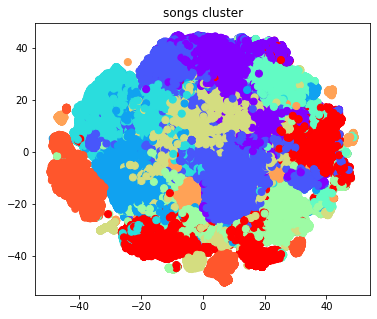

In [27]:
labels = df_s['k10'].values

plt.figure(figsize=(6,5))
plt.title("songs cluster")

plt.scatter(x=df_s_2d[:,0],y=df_s_2d[:,1],c=df['k10'],s=50,cmap='rainbow')


In [ ]:
# we want to put the cluster centers on top of the first two features
k10_centers = k10.cluster_centers_
sns.scatterplot(data=df, x="acousticness", y="energy", cmap="popularity", hue="k10")
plt.scatter(k15_centers[:,0], k15_centers[:,1], c="g", s=100)